## Bank Telemarketing Campaign Case Study.

This case study is all about how Exploratory Data Analysis could help the bank to achieve high positive response rate towards a new campaign.

#### Importing the libraries.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part- 2, Data Cleaning

### Description about Data Types in the Banking dataset

There are multiple data types available in the data set. some of them are numerical type and some are categorical type.

Following are the some of the types of variables:
- **Numeric data type**: salary, balance, duration and age.
- **Categorical data type**:  education, job, marital, poutcome and month etc.
- **Ordinal data type**:  Age group.
- **Time and date type**
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set.

In [ ]:
#read the data set of "bank telemarketing campaign" in inp0.
path= '/content/drive/MyDrive/Colab Notebooks/bank_marketing_updated_v1.csv'
inp0= pd.read_csv(path)



<ipython-input-45-729dc359cd68>:3: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0= pd.read_csv(path)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


#### Read the file without unnecessary headers.

In [ ]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv(path, skiprows=2)

In [ ]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [ ]:
#print the information of variables to check their data types.
inp0.dtypes

customerid      int64
age           float64
salary          int64
balance         int64
marital        object
jobedu         object
targeted       object
default        object
housing        object
loan           object
contact        object
day             int64
month          object
duration       object
campaign        int64
pdays           int64
previous        int64
poutcome       object
response       object
dtype: object

In [ ]:
#print the average age of customers.
inp0.age.mean()

40.93565090394105

#### Dropping customer id column.

In [ ]:
#drop the customer id as it is of no use.
inp0.drop("customerid", axis=1, inplace=True)

#### Dividing "jobedu" column into job and education categories.

In [ ]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [ ]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.apply(lambda x:x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu", axis= 1, inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


Impute/Remove missing values

#### handling missing values in age column.

In [ ]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [ ]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [ ]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

Drop the records with age missing.

In [ ]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()].copy()
inp1.age.isnull().sum()
inp1.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### handling missing values in month column

In [ ]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [ ]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [ ]:
#find the mode of month in inp1
month_mode= inp1.month.mode()[0]
month_mode

'may, 2017'

In [ ]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace= True)
inp1.month.value_counts(normalize = True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [ ]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column

In [ ]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [ ]:
#calculate the percentage of missing values in response column.
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64


- Drop the records with missing values.

In [ ]:
#drop the records with response missings in inp1.
inp1= inp1[~inp1.response.isnull()]
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [ ]:
#calculate the missing values in each column of data frame: inp1.
inp1.response.isnull().sum()
inp1


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


#### handling pdays column.

In [ ]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
Handling such problems by two ways
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median.

In [ ]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0,'pdays']= np.NaN
inp1.pdays.describe()
inp1

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,NaN,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,NaN,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184.0,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,NaN,0,unknown,no,blue-collar,secondary


Handling Outliers

Different steps in removing Outliers

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable

In [ ]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

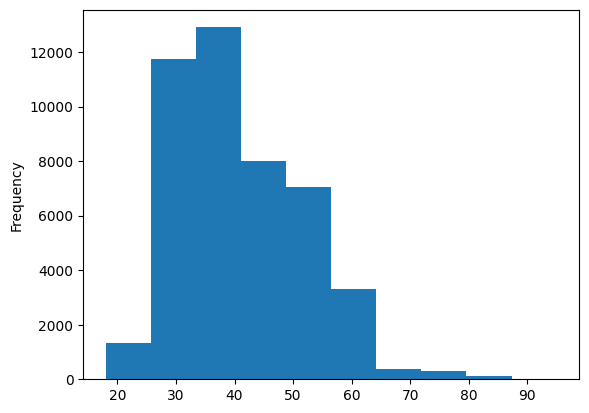

In [ ]:
#plot the histogram of age variable.
inp1.age.plot.hist()

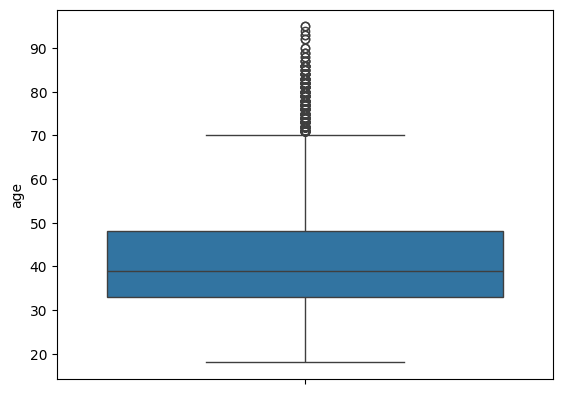

In [ ]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

#### Salary variable

In [ ]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: ylabel='salary'>

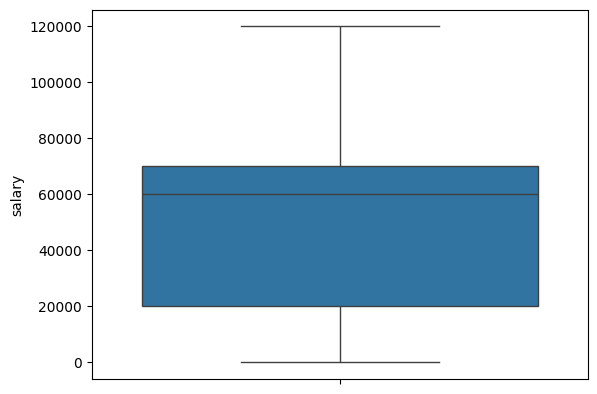

In [ ]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)

#### Balance variable

In [ ]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

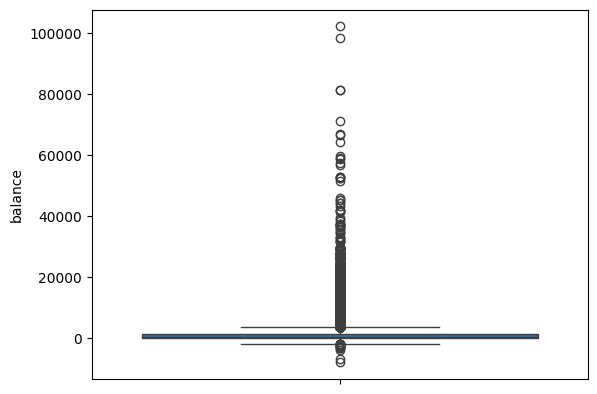

In [ ]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)
plt.show()

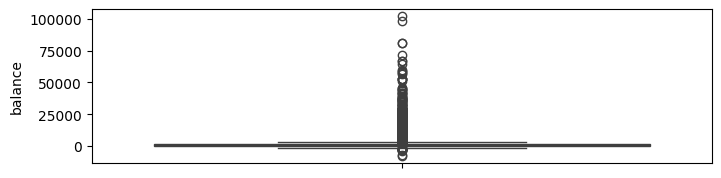

In [ ]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [ ]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

## Performing Univariate Analysis on Banking dataset

 Categorical unordered univariate analysis

#### Marital status

In [ ]:
#calculate the percentage of each marital status category.
inp1.marital.value_counts(normalize= True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

<Axes: >

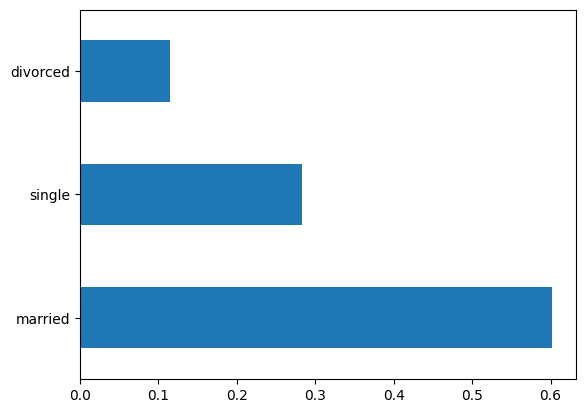

In [ ]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize= True).plot.barh()

#### Job  

In [ ]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

<Axes: >

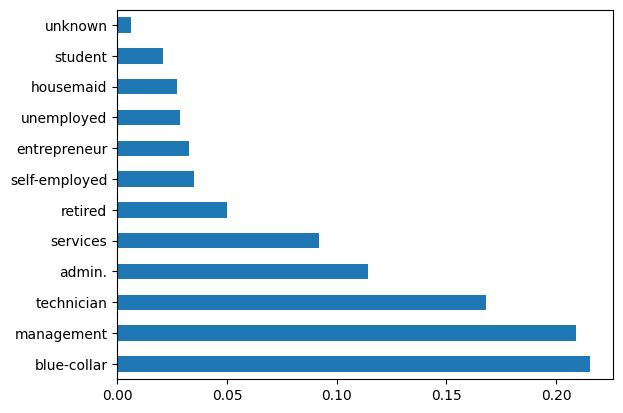

In [ ]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.barh()

 Categorical ordered univariate analysis

#### Education

In [ ]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

<Axes: ylabel='education'>

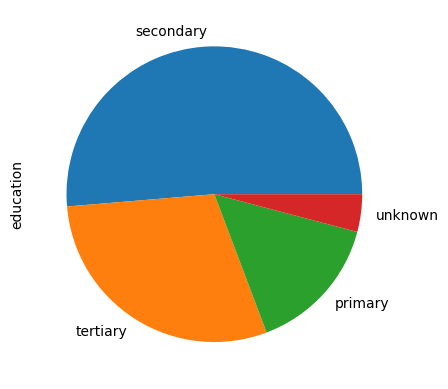

In [ ]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()

#### poutcome

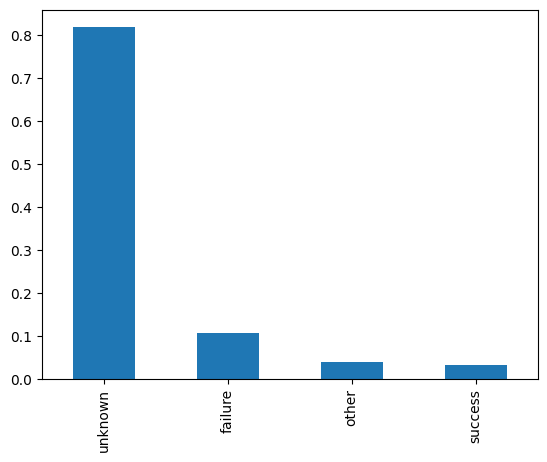

In [ ]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize= True).plot.bar()
plt.show()

#### Response the target variable

In [ ]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize= True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

<Axes: ylabel='response'>

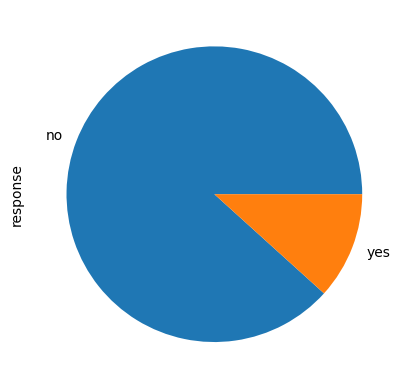

In [ ]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize= True).plot.pie()

Bivariate and Multivariate Analysis on Banking data

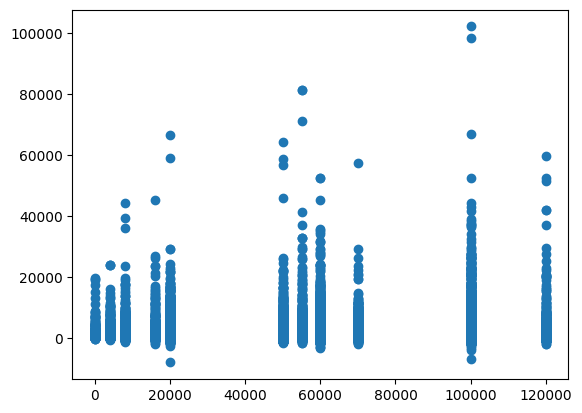

In [ ]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)
plt.show()

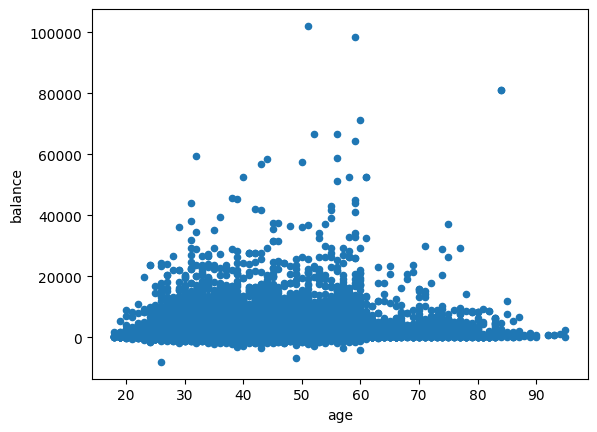

In [ ]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x= "age", y= "balance")
plt.show()

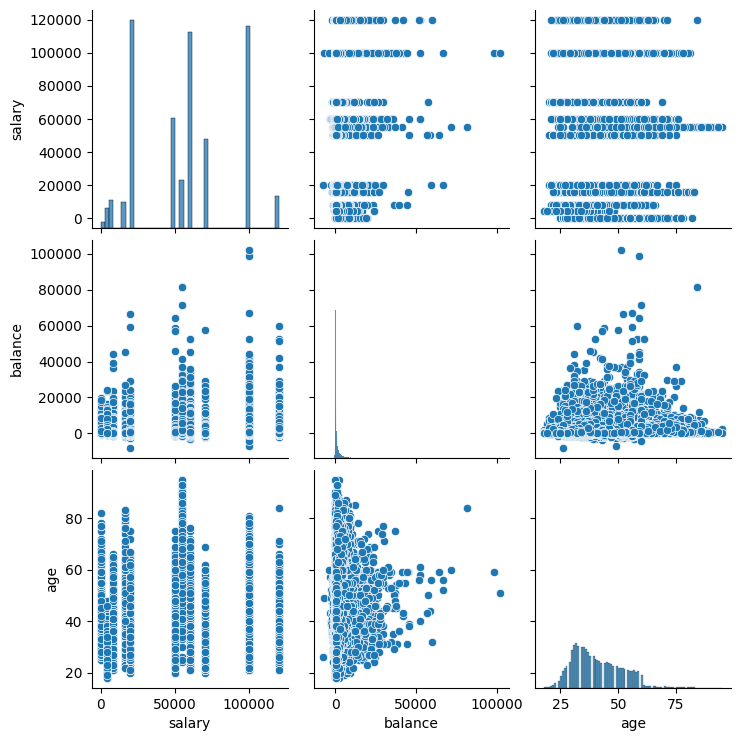

In [ ]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data= inp1, vars= ["salary", "balance", "age"])
plt.show()

#### Correlation heat map

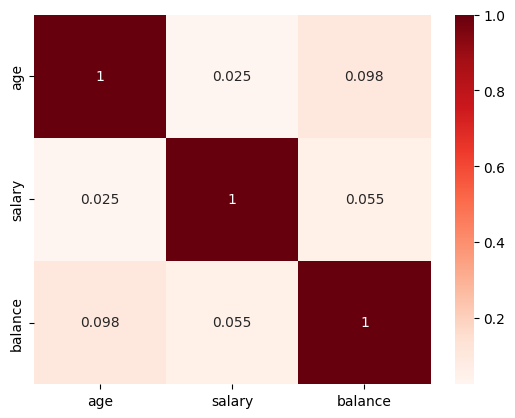

In [ ]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[["age", "salary", "balance"]].corr(), annot= True, cmap= "Reds")
plt.show()


#### Salary vs response

In [ ]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

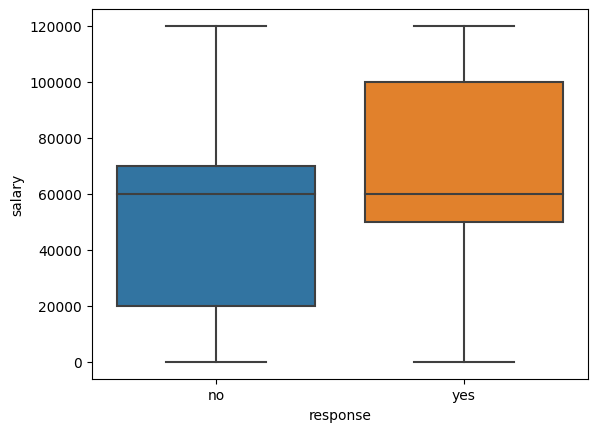

In [ ]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data= inp1, x= "response", y= "salary")
plt.show()

#### Balance vs response

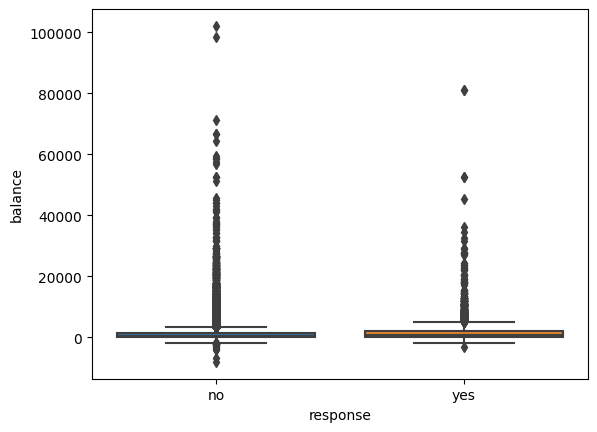

In [ ]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data= inp1, x= "response", y= "balance")
plt.show()


In [ ]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby("response")['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [ ]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby("response")['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile

In [ ]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [ ]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<Axes: ylabel='response'>

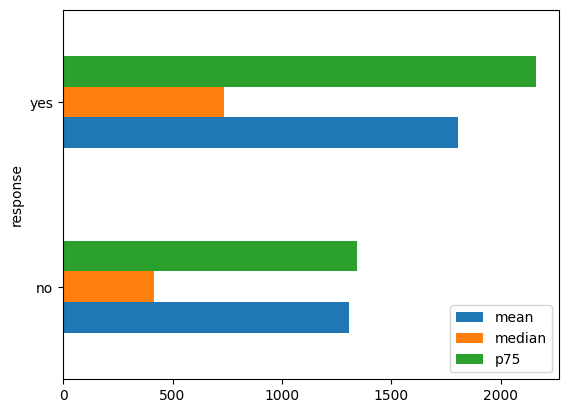

In [ ]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75]).plot.barh()

#### Education vs salary

In [ ]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [ ]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [ ]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

 Categorical categorical variable Analysis

In [ ]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag']= np.where(inp1.response== 'yes',1,0)
inp1.response_flag.value_counts(normalize= True)

0    0.882974
1    0.117026
Name: response_flag, dtype: float64

#### Education vs response rate

In [ ]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate

In [ ]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(['marital'])['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

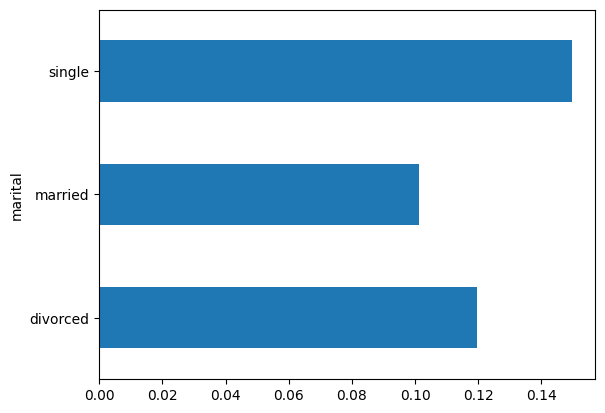

In [ ]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(['marital'])['response_flag'].mean().plot.barh()

#### Loans vs response rate

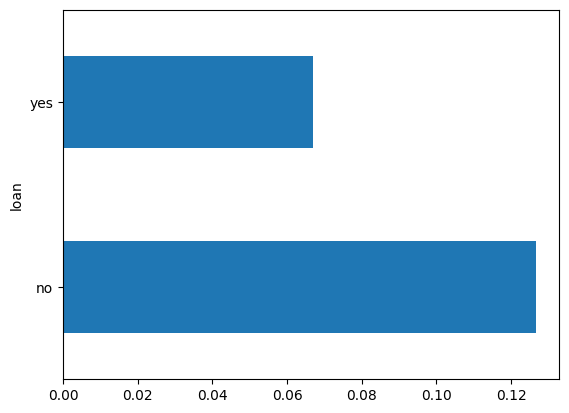

In [ ]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(['loan'])['response_flag'].mean().plot.barh()
plt.show()

#### Housing loans vs response rate

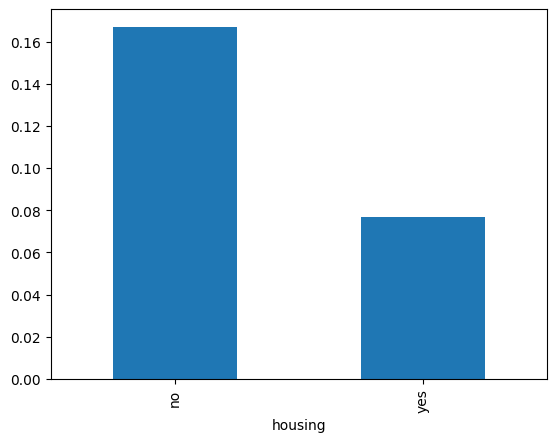

In [ ]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(['housing'])['response_flag'].mean().plot.bar()
plt.show()

#### Age vs response

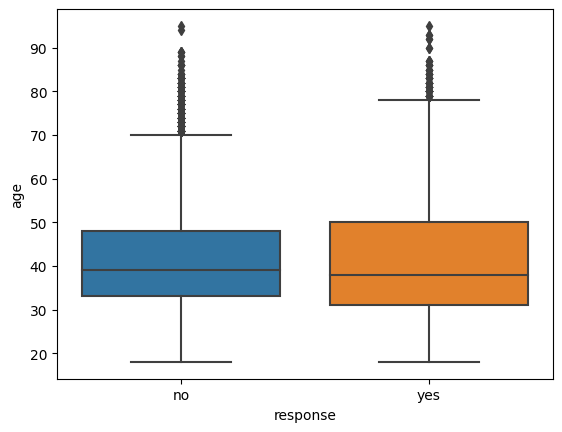

In [ ]:
#plot the boxplot of age with response_flag
sns.boxplot(data= inp1, x= "response", y= "age")
plt.show()

##### making buckets from age columns

In [ ]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_group"]= pd.cut(inp1.age, [0,30,40,50,60,9999], labels= ["<30", "30-40", "40-50", "50-60", "60+"])
inp1.age_group.value_counts(normalize= True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

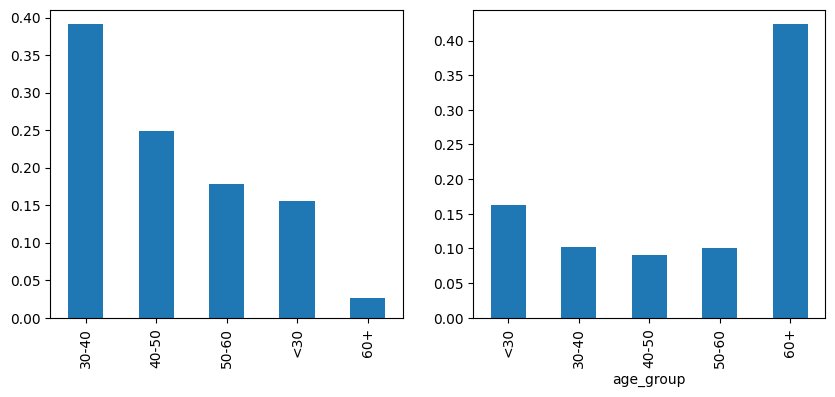

In [ ]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_group"])['response_flag'].mean().plot.bar()
plt.show()

<Axes: ylabel='job'>

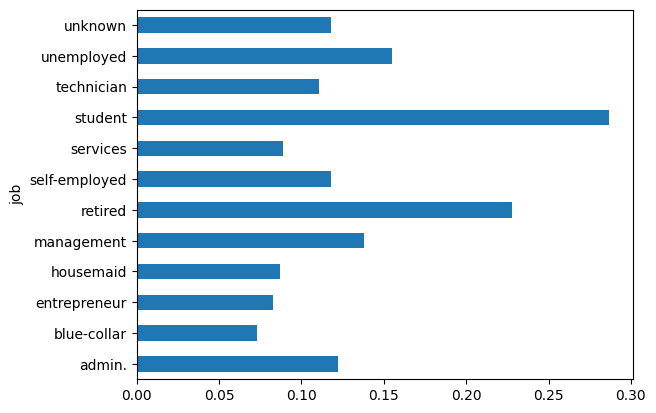

In [ ]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby('job')['response_flag'].mean().plot.barh()

 Multivariate analysis on Banking data

#### Education vs marital vs response

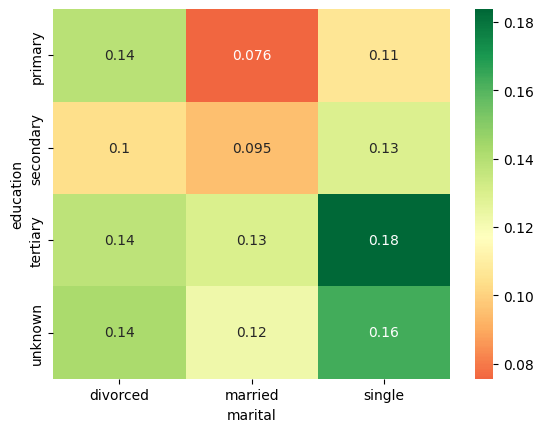

In [ ]:
#create heat map of education vs marital vs response_flag
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

#### Job vs marital vs response

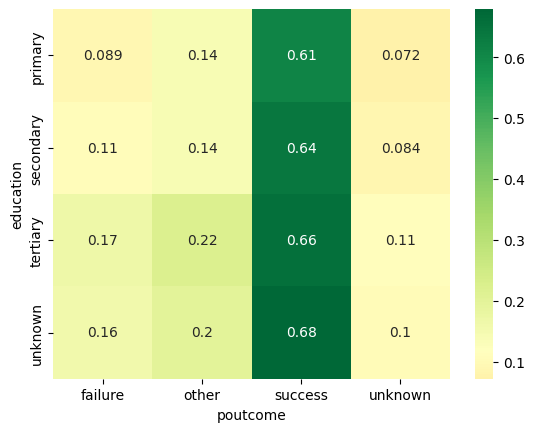

In [ ]:
#create the heat map of Job vs marital vs response_flag.
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.117)
plt.show()

#### Education vs poutcome vs response

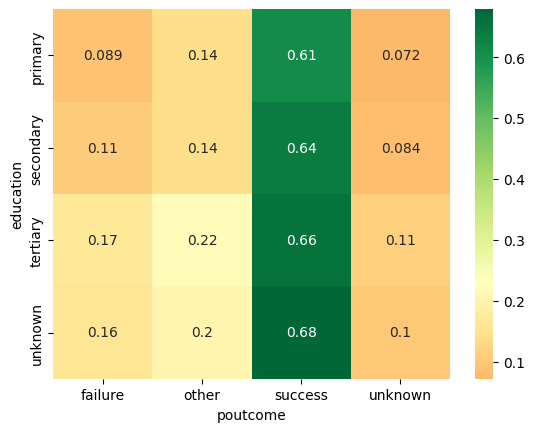

In [ ]:
#create the heat map of education vs poutcome vs response_flag.
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.2308)
plt.show()

Inferences

*Effect of Economic Factors: Explore the impact of customer salary, balance, and loan types on their response to the campaign. This could help the bank to tailor camapaigns based on economic factors.

*Campaign Analysis:Analysing the campaign outcomes based on different features like marital status, education level, job type. This information could really help the bank to understand which customer segment are likely to respond positively to campaign.

*Are there particular age groups that are more likely to respond positively to the marketing campaign? After drawing the age vs response distribution plot, its interesting to see age groups less than 30 and greater than 60+ are more likely to respond positively to camapign.

*How does marital status or education level affect the likelihood of a positive response? It could be seen from the analysis that people who are single and from a teritiary education background are more likely to have a higher positive response towards the campaign.














